# Beslissingsbomen

In [28]:
import numpy as np
import pandas as pd
from IPython import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

simpsons = pd.read_csv('data/simpsons_nominal.csv')
display(simpsons)

,haarlengte,gewicht,leeftijd,geslacht
0,<3,>160,30-40,M
1,>5,<=160,30-40,V
2,<3,<=160,<30,M
3,>5,<=160,<30,V
4,3-5,<=160,<30,V
5,<3,>160,>40,M
6,>5,<=160,>40,V
7,>5,>160,30-40,M
8,>5,>160,>40,M


# Simpsons

Kenmerken of attributen van de Simpsons zijn
* haarlengte
* gewicht
* leeftijd

Eén kolom is target:
* geslacht


In [29]:
# kies haarlengte als kolom
kolom_naam = 'haarlengte'
display(simpsons[kolom_naam].unique())

array(['<3', '>5', '3-5'], dtype=object)

In [30]:
kind_tabel_1 = simpsons[simpsons[kolom_naam] == '<3']
kind_tabel_2 = simpsons[simpsons[kolom_naam] == '>5']
kind_tabel_3 = simpsons[simpsons[kolom_naam] == '3-5']
display(kind_tabel_1)
display(kind_tabel_2)
display(kind_tabel_3)

,haarlengte,gewicht,leeftijd,geslacht
0,<3,>160,30-40,M
2,<3,<=160,<30,M
5,<3,>160,>40,M


,haarlengte,gewicht,leeftijd,geslacht
1,>5,<=160,30-40,V
3,>5,<=160,<30,V
6,>5,<=160,>40,V
7,>5,>160,30-40,M
8,>5,>160,>40,M


,haarlengte,gewicht,leeftijd,geslacht
4,3-5,<=160,<30,V


In [31]:
display(simpsons.geslacht.value_counts())  # oudertabel

display(kind_tabel_1.geslacht.value_counts())
display(kind_tabel_2.geslacht.value_counts())
display(kind_tabel_3.geslacht.value_counts())

geslacht
M    5
V    4
Name: count, dtype: int64

geslacht
M    3
Name: count, dtype: int64

geslacht
V    3
M    2
Name: count, dtype: int64

geslacht
V    1
Name: count, dtype: int64

## Entropie

In [32]:
def entropy(series: pd.Series, base=None):
    vc = series.value_counts(normalize=True, sort=False)
    base = 2 if base is None else base
    return -(vc * np.log2(vc)).sum()
    # return -(vc * np.log(vc) / np.log(base)).sum()

In [33]:
E_ouder = entropy(simpsons.geslacht)
print('Entropy, E(S) =', E_ouder)

Entropy, E(S) = 0.9910760598382222


## Information Gain

In [34]:
print(entropy(kind_tabel_1.geslacht))
print(entropy(kind_tabel_2.geslacht))
print(entropy(kind_tabel_3.geslacht))

-0.0
0.9709505944546686
-0.0


In [35]:
E1 = entropy(kind_tabel_1.geslacht)  # 0.0
E2 = entropy(kind_tabel_2.geslacht)  # 0.971
E3 = entropy(kind_tabel_3.geslacht)  # 0

E_gewogen = np.average([E1, E2, E3], weights=[3, 5, 1])
display(E_gewogen)

0.5394169969192604

In [36]:
IG_haarlengte = E_ouder - E_gewogen
display(IG_haarlengte)

0.45165906291896185

In [37]:
def information_gain(parent_table: pd.DataFrame, attribute: str, target: str):
    # bepaal entropie van parent table
    entropy_parent = entropy(parent_table[target])
    child_entropies = []
    child_weights = []

    # bereken entropies of child tables
    for (label, fraction) in parent_table[attribute].value_counts().items():
        child_df = parent_table[parent_table[attribute] == label]
        child_entropies.append(entropy(child_df[target]))
        child_weights.append(int(fraction))

    # calculate the difference between parent entropy and weighted child entropies
    return entropy_parent - np.average(child_entropies, weights=child_weights)

In [38]:
IG_haarlengte = information_gain(simpsons, 'haarlengte', 'geslacht') # 0.45165906291896185
IG_leeftijd = information_gain(simpsons, 'leeftijd', 'geslacht') # 0.07278022578373267
IG_gewicht = information_gain(simpsons, 'gewicht', 'geslacht') # 0.5900048960119099

print(IG_haarlengte, IG_leeftijd, IG_gewicht)

0.45165906291896185 0.07278022578373267 0.5900048960119099


In [39]:
for key, group in simpsons.groupby(by='gewicht', as_index=False):
    display(pd.DataFrame(group))

,haarlengte,gewicht,leeftijd,geslacht
1,>5,<=160,30-40,V
2,<3,<=160,<30,M
3,>5,<=160,<30,V
4,3-5,<=160,<30,V
6,>5,<=160,>40,V


,haarlengte,gewicht,leeftijd,geslacht
0,<3,>160,30-40,M
5,<3,>160,>40,M
7,>5,>160,30-40,M
8,>5,>160,>40,M


In [40]:
s = simpsons['haarlengte']
for (label, count) in s.value_counts(normalize=True).items():
    print('{} {}'.format(label, count))
    print(simpsons['haarlengte'][simpsons['haarlengte'] == label])

>5 0.5555555555555556
1    >5
3    >5
6    >5
7    >5
8    >5
Name: haarlengte, dtype: object
<3 0.3333333333333333
0    <3
2    <3
5    <3
Name: haarlengte, dtype: object
3-5 0.1111111111111111
4    3-5
Name: haarlengte, dtype: object


## ID3Estimator & Graphviz packages installeren

* `pip install decision-tree-id-fork`
* Graphviz <a href="https://graphviz.org/download/">installeren</a> (nodig voor de visualisatie) door te downloaden van de website voor Windows en Mac en te installeren.
    *  Zorg ervoor dat je GraphViz toevoegt aan je PATH in de installatiewizard!
    *  Anders krijg je _ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH_
* `pip install graphviz` moet je ook nog doen

In [41]:
import pandas as pd
import graphviz
from id3 import Id3Estimator, export_graphviz

simpsons = pd.read_csv("data/simpsons_nominal.csv")
model = Id3Estimator()

# X = attributen; y = target
X = simpsons.drop(columns=['geslacht'], axis=1)
y = simpsons['geslacht']
print(X)
print(y)

  haarlengte gewicht leeftijd
0         <3    >160    30-40
1         >5   <=160    30-40
2         <3   <=160      <30
3         >5   <=160      <30
4        3-5   <=160      <30
5         <3    >160      >40
6         >5   <=160      >40
7         >5    >160    30-40
8         >5    >160      >40
0    M
1    V
2    M
3    V
4    V
5    M
6    V
7    M
8    M
Name: geslacht, dtype: object


Id3Estimator()

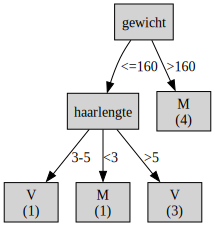

array(['M', 'V'], dtype=object)

In [42]:
# bouw het model
model.fit(X, y)

# maak model
model_tree = export_graphviz(model.tree_, feature_names=X.columns)
# toon beslissingsboom
graphviz.Source(model_tree.dot_tree)

# test model
# Comic Guy is een ...
model.predict(np.array([
    ['>5', '>160', '30-40'], # comic guy
    ['>5','<=160', '30-40']  # comic girl
]))


,naam,haarlengte,gewicht,leeftijd,geslacht
0,Homer,0,250,36,M
1,Marge,10,150,34,V
2,Bart,2,90,10,M
3,Lisa,6,78,8,V
4,Maggie,4,20,1,V
5,Abe,1,170,70,M
6,Selma,8,160,41,V
7,Otto,10,180,38,M
8,Krusty,6,200,45,M


DecisionTreeClassifier(criterion='entropy')

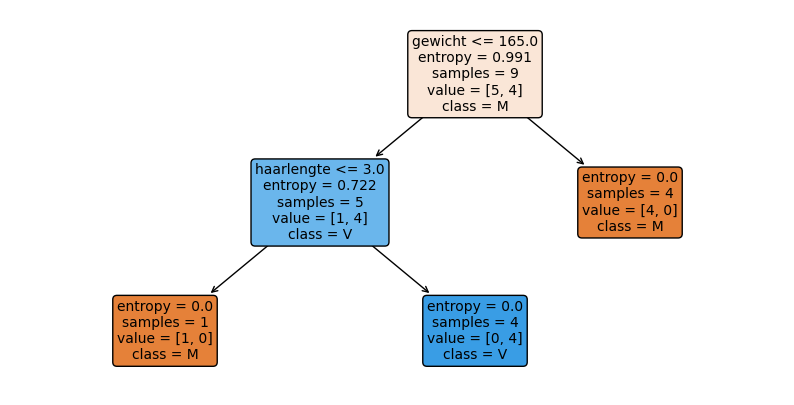

In [44]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

simpsons = pd.read_csv('data/simpsons.csv')
display(simpsons)

X = simpsons.drop(columns=['geslacht', 'naam'])
y = simpsons.geslacht

model = DecisionTreeClassifier(criterion='entropy')
model.fit(X, y)

fig, ax = plt.subplots(figsize=(10, 5))
_ = tree.plot_tree(model, ax=ax, feature_names=X.columns, class_names=np.unique(y), filled=True, fontsize=10, rounded=True)

## Pandas getdummies functie

Met de `get_dummies` functie van Pandas kun je een kolom met categorische waarden omzetten naar meerdere kolommen met numerieke waarden. Dit is nodig omdat de DecisionTreeClassifier implementatie van Scikit-learn alleen numerieke waarden accepteert.

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

simpsons = pd.read_csv('data/simpsons_nominal.csv', index_col=0)

X = pd.get_dummies(simpsons.drop(columns=['geslacht']))
y = simpsons.geslacht

# toon dummies versie van Simpsons nominale dataset
X.style.highlight_max(color='lightgreen', axis=0)

model = DecisionTreeClassifier(criterion='entropy')
model.fit(X, y)

_, ax = plt.subplots(figsize=(10, 5))
_ = tree.plot_tree(model, ax=ax, feature_names=X.columns, class_names=np.unique(y), filled=True, fontsize=10, rounded=True)